In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")


In [2]:
cwd = os.getcwd()

In [3]:
ip_filepath = os.path.dirname(cwd)+'\\WineQT.csv'

In [4]:
wq_df = pd.read_csv(ip_filepath)

In [5]:
print(wq_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [6]:
wq = wq_df.copy()

In [7]:
wq.drop('Id',axis=1, inplace=True)
print("Dropped the Id column as it is an index column, and the df has already possess an index column")

Dropped the Id column as it is an index column, and the df has already possess an index column


In [8]:
def replace_spaces(df):
    return df.columns.str.replace(" ","_")
def title_name(df):
    return df.columns.str.title()

In [9]:
wq.columns = replace_spaces(wq)
wq.columns = title_name(wq)

In [10]:
print(wq.columns)

Index(['Fixed_Acidity', 'Volatile_Acidity', 'Citric_Acid', 'Residual_Sugar',
       'Chlorides', 'Free_Sulfur_Dioxide', 'Total_Sulfur_Dioxide', 'Density',
       'Ph', 'Sulphates', 'Alcohol', 'Quality'],
      dtype='object')


In [11]:
wq.dtypes

Fixed_Acidity           float64
Volatile_Acidity        float64
Citric_Acid             float64
Residual_Sugar          float64
Chlorides               float64
Free_Sulfur_Dioxide     float64
Total_Sulfur_Dioxide    float64
Density                 float64
Ph                      float64
Sulphates               float64
Alcohol                 float64
Quality                   int64
dtype: object

In [12]:
wq.Quality = wq.Quality.apply(lambda x: 1 if x>= 6 else 0)

In [13]:
wq.head()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,Ph,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Exploratory Data Analysis

In [14]:
classifiers = wq.loc[:, wq.columns != 'Quality']

In [15]:
# Data Distribution of all the features

def feat_analysis(feature):
    
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    plt.subplot(1, 3, 2)
    sb.distplot(feature)
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sb.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    
    plt.show()

*******************************************Fixed_Acidity********************************************


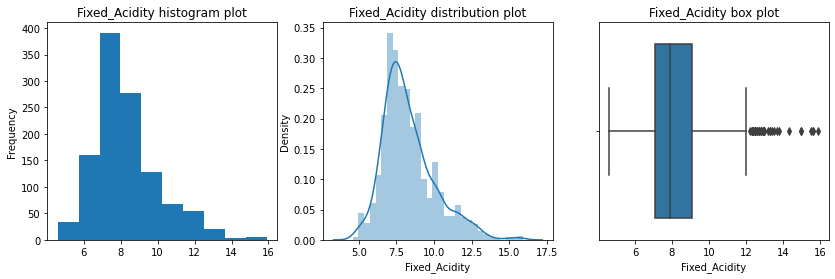


******************************************Volatile_Acidity******************************************


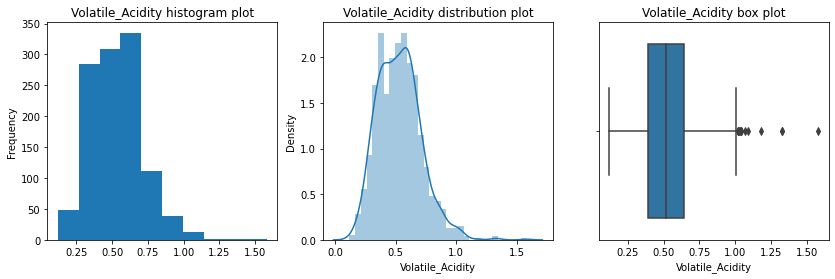


********************************************Citric_Acid*********************************************


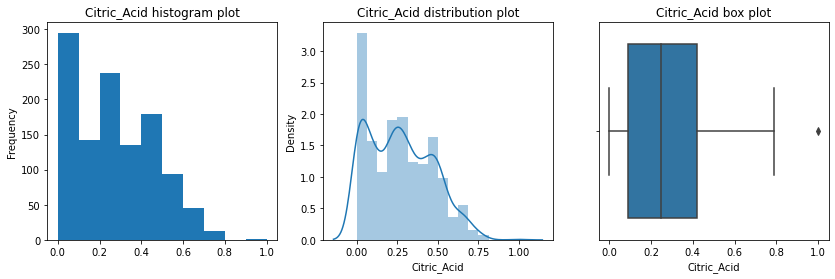


*******************************************Residual_Sugar*******************************************


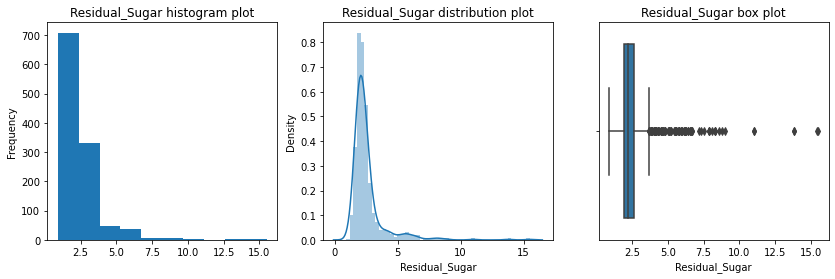


*********************************************Chlorides**********************************************


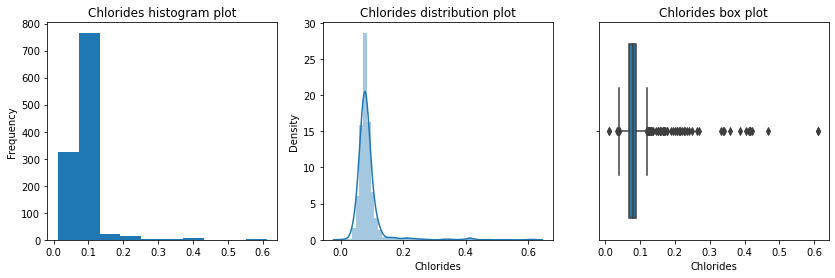


****************************************Free_Sulfur_Dioxide*****************************************


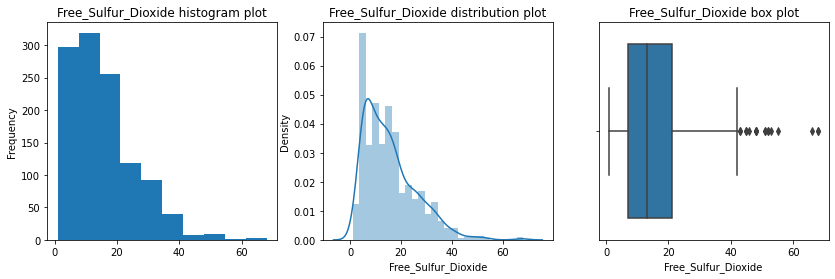


****************************************Total_Sulfur_Dioxide****************************************


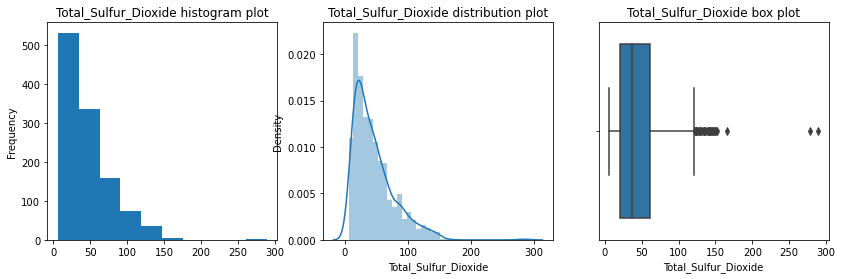


**********************************************Density***********************************************


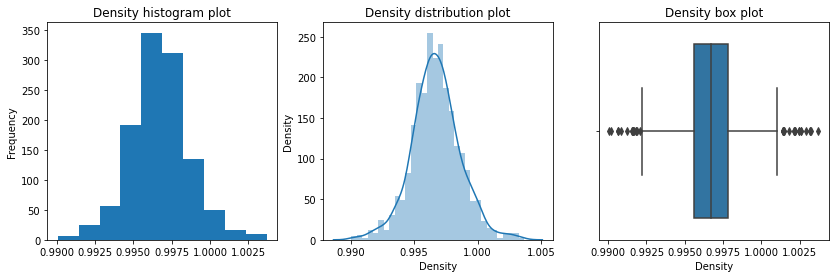


*************************************************Ph*************************************************


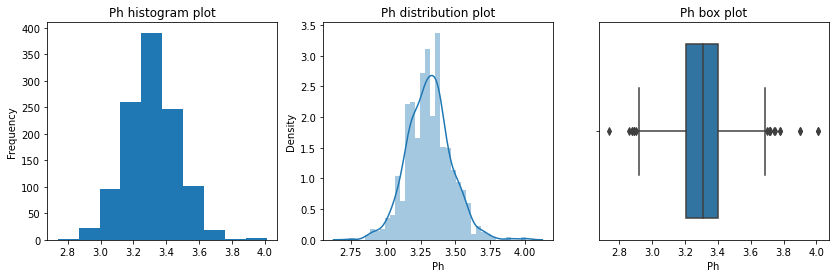


*********************************************Sulphates**********************************************


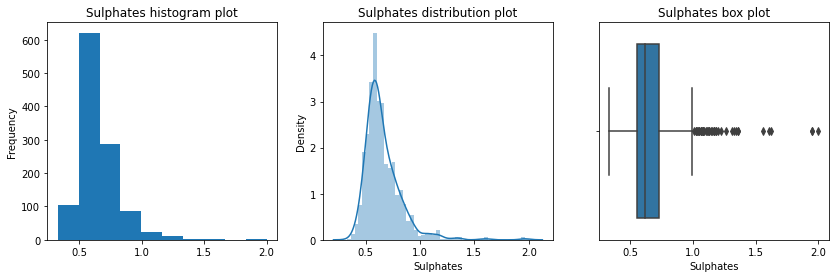


**********************************************Alcohol***********************************************


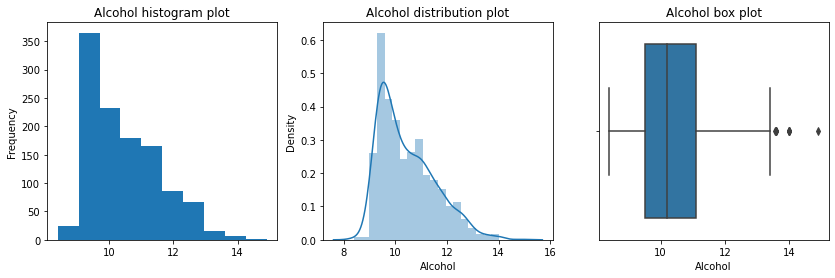

In [16]:
for feature in classifiers.columns:
    print(feature.center(100,"*"))
    feat_analysis(classifiers[feature])
    print()

### Distribution of the classifiers
- Fixed_Acidity , Gaussian
- Volatile_Acidity, Almost Gaussian
- Citric_Acid, left skewed and multi modal
- Residual_Sugar, log-normal
- Chlorides, log-normal
- Free_Sulfur_Dioxide, log-normal
- Total_Sulfur_Dioxide, log-normal
- Density, Gaussian
- Ph, Gaussian
- Sulphates, Almost Gaussian
- Alcohol, log-normal

In [17]:
classifiers_ref_trans = list(set(classifiers.columns)-set(['Fixed_Acidity','Density','Ph']))

In [18]:
classifiers_sqrt = classifiers.copy()

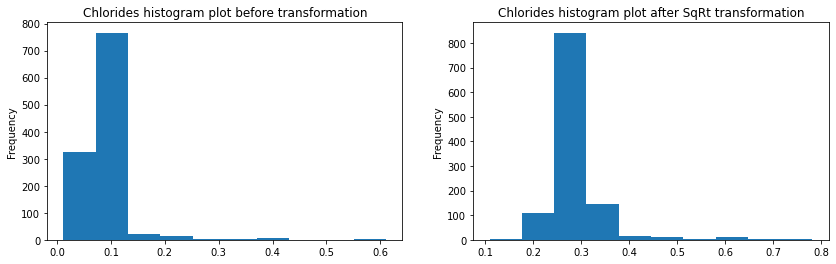

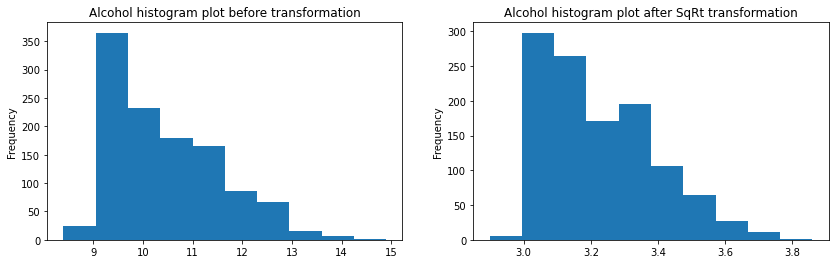

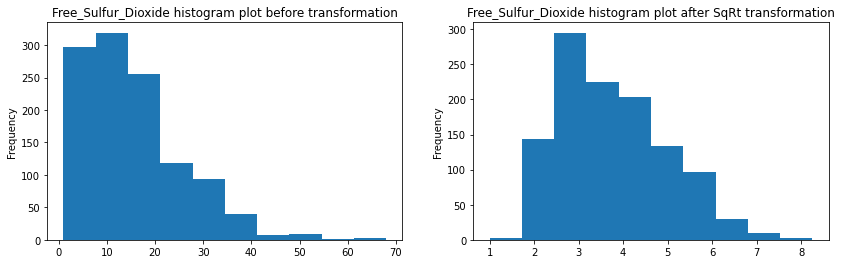

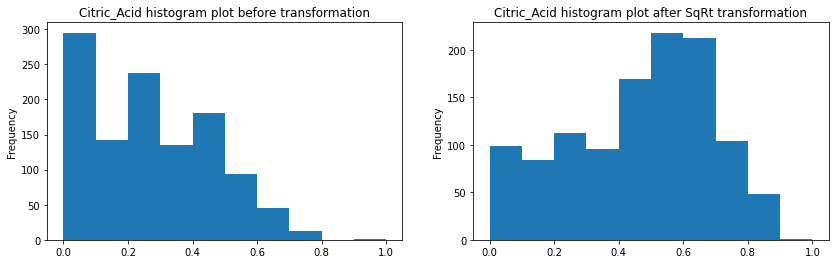

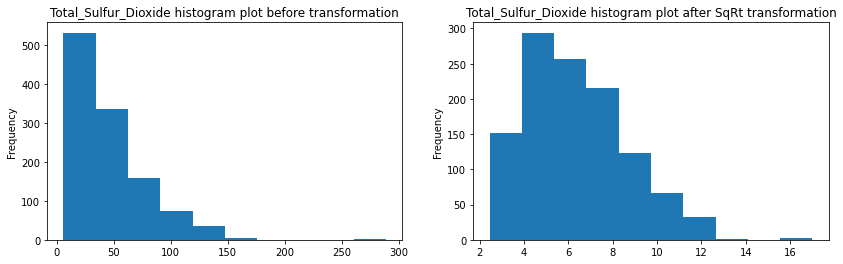

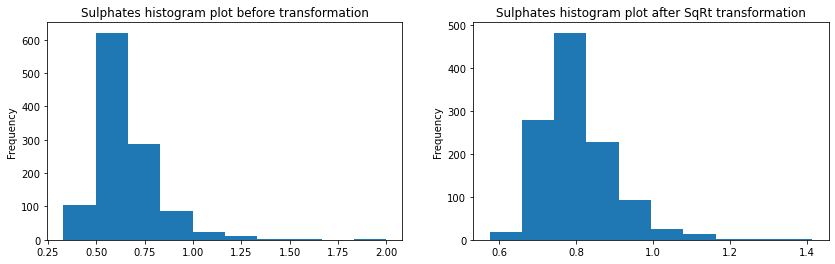

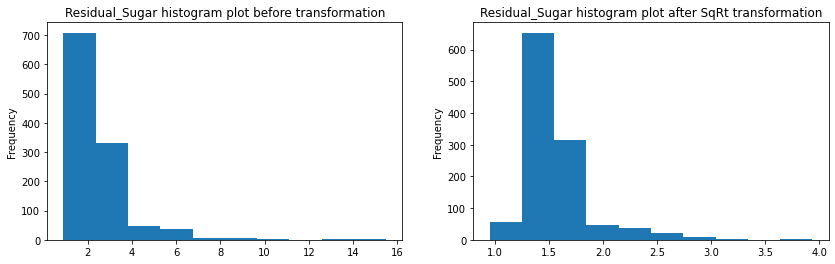

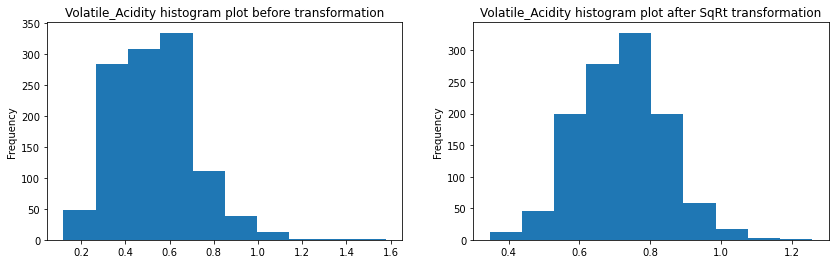

In [19]:
for item in classifiers_ref_trans:
    classifiers_sqrt[item] = np.sqrt(classifiers_sqrt[item])
    
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    classifiers[item].plot(kind = 'hist')
    plt.title(f'{item} histogram plot before transformation')
    
    plt.subplot(1, 2, 2)
    classifiers_sqrt[item].plot(kind = 'hist')
    plt.title(f'{item} histogram plot after SqRt transformation')

    plt.show()

### Split Train and Test data

In [20]:
def getTrainTestSplit(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)
    print(f'Shape of the X_train: {X_train.shape}')
    print(f'Shape of the X_test: {X_test.shape}')
    print(f'Shape of the y_train: {y_train.shape}')
    print(f'Shape of the y_test: {y_test.shape}')
    
    return X_train, X_test, y_train, y_test

In [21]:
X_train, X_test, y_train, y_test = getTrainTestSplit(classifiers, wq.Quality)

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)
Shape of the y_train: (914,)
Shape of the y_test: (229,)


### Build Logistic Regression Model

In [22]:
lg = LogisticRegression(random_state=0)

In [23]:
lg_mod = lg.fit(X_train,y_train)

In [24]:
lg_pred = lg_mod.predict(X_test)

In [25]:
print("Confusion Matrix of the Logistic Regression Model: \n {}".format(confusion_matrix(y_test, lg_pred)))
print("Training score of the Logistic Regression Model: \n{} %".format(round(lg_mod.score(X_train,y_train)*100,2)))
print("Accuracy score of the Logistic Regression Model: \n{} %".format(round(accuracy_score(y_test, lg_pred)*100,2)))

Confusion Matrix of the Logistic Regression Model: 
 [[86 23]
 [26 94]]
Training score of the Logistic Regression Model: 
75.16 %
Accuracy score of the Logistic Regression Model: 
78.6 %


### Build the model on transformed classifiers

In [26]:
X_train, X_test, Y_train, y_test = getTrainTestSplit(classifiers_sqrt, wq.Quality)

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)
Shape of the y_train: (914,)
Shape of the y_test: (229,)


In [27]:
lg1 = LogisticRegression(random_state=0)
lg1_mod = lg1.fit(X_train,y_train)
lg1_pred = lg1_mod.predict(X_test)

In [28]:
print("Confusion Matrix of the Logistic Regression Model: \n {}".format(confusion_matrix(y_test, lg1_pred)))
print("Training score of the Logistic Regression Model: \n{} %".format(round(lg1_mod.score(X_train,y_train)*100,2)))
print("Accuracy score of the Logistic Regression Model: \n{} %".format(round(accuracy_score(y_test, lg1_pred)*100,2)))
print("Classification Report: \n",classification_report(y_test, lg1_pred))

Confusion Matrix of the Logistic Regression Model: 
 [[89 20]
 [25 95]]
Training score of the Logistic Regression Model: 
75.38 %
Accuracy score of the Logistic Regression Model: 
80.35 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       109
           1       0.83      0.79      0.81       120

    accuracy                           0.80       229
   macro avg       0.80      0.80      0.80       229
weighted avg       0.80      0.80      0.80       229



### Feature Scaling to bring all the data to standard gaussian distribution

In [29]:
scaler = StandardScaler()

In [30]:
classifiers.head()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,Ph,Sulphates,Alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [31]:
classifiers_scaled = pd.DataFrame(scaler.fit_transform(classifiers), columns = classifiers.columns)

In [32]:
classifiers_scaled.head()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,Ph,Sulphates,Alcohol
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382


### Build the model on scaled classifiers (untransformed)

In [33]:
X_train, X_test, Y_train, y_test = getTrainTestSplit(classifiers_scaled, wq.Quality)

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)
Shape of the y_train: (914,)
Shape of the y_test: (229,)


In [34]:
lg2 = LogisticRegression(random_state=0)
lg2_mod = lg2.fit(X_train,y_train)
lg2_pred = lg2_mod.predict(X_test)

In [35]:
print("Confusion Matrix of the Logistic Regression Model: \n {}".format(confusion_matrix(y_test, lg2_pred)))
print("Training score of the Logistic Regression Model: \n{} %".format(round(lg2_mod.score(X_train,y_train)*100,2)))
print("Accuracy score of the Logistic Regression Model: \n{} %".format(round(accuracy_score(y_test, lg2_pred)*100,2)))
print("Classification Report: \n",classification_report(y_test, lg2_pred))

Confusion Matrix of the Logistic Regression Model: 
 [[85 24]
 [26 94]]
Training score of the Logistic Regression Model: 
74.62 %
Accuracy score of the Logistic Regression Model: 
78.17 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       109
           1       0.80      0.78      0.79       120

    accuracy                           0.78       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.78      0.78      0.78       229



### Feature Scaling to bring all the transformed data to standard gaussian distribution

In [36]:
classifiers_sqrt.head()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,Ph,Sulphates,Alcohol
0,7.4,0.836660,0.000000,1.378405,0.275681,3.316625,5.830952,0.9978,3.51,0.748331,3.065942
1,7.8,0.938083,0.000000,1.612452,0.313050,5.000000,8.185353,0.9968,3.20,0.824621,3.130495
2,7.8,0.871780,0.200000,1.516575,0.303315,3.872983,7.348469,0.9970,3.26,0.806226,3.130495
3,11.2,0.529150,0.748331,1.378405,0.273861,4.123106,7.745967,0.9980,3.16,0.761577,3.130495
4,7.4,0.836660,0.000000,1.378405,0.275681,3.316625,5.830952,0.9978,3.51,0.748331,3.065942


In [37]:
classifiers_sqrt_scaled = pd.DataFrame(scaler.fit_transform(classifiers_sqrt), columns = classifiers_sqrt.columns)

In [38]:
classifiers_sqrt_scaled.head()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,Ph,Sulphates,Alcohol
0,-0.521580,0.961579,-1.988613,-0.541052,-0.233823,-0.349422,-0.252373,0.555854,1.270695,-0.594900,-0.981458
1,-0.292593,1.786933,-1.988613,0.168958,0.414594,1.004699,0.799622,0.036165,-0.708928,0.201550,-0.588677
2,-0.292593,1.247374,-1.129260,-0.121895,0.245681,0.098118,0.425685,0.140103,-0.325775,0.009506,-0.588677
3,1.653789,-1.540854,1.226790,-0.541052,-0.265398,0.299318,0.603295,0.659792,-0.964363,-0.456616,-0.588677
4,-0.521580,0.961579,-1.988613,-0.541052,-0.233823,-0.349422,-0.252373,0.555854,1.270695,-0.594900,-0.981458


### Build the model on scaled classifiers (transformed)

In [39]:
X_train, X_test, Y_train, y_test = getTrainTestSplit(classifiers_sqrt_scaled, wq.Quality)

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)
Shape of the y_train: (914,)
Shape of the y_test: (229,)


In [40]:
lg3 = LogisticRegression(random_state=0)
lg3_mod = lg3.fit(X_train,y_train)
lg3_pred = lg3_mod.predict(X_test)

In [41]:
print("Confusion Matrix of the Logistic Regression Model: \n {}".format(confusion_matrix(y_test, lg3_pred)))
print("Training score of the Logistic Regression Model: \n{} %".format(round(lg3_mod.score(X_train,y_train)*100,2)))
print("Accuracy score of the Logistic Regression Model: \n{} %".format(round(accuracy_score(y_test, lg3_pred)*100,2)))
print("Classification Report: \n",classification_report(y_test, lg3_pred))

Confusion Matrix of the Logistic Regression Model: 
 [[86 23]
 [23 97]]
Training score of the Logistic Regression Model: 
75.71 %
Accuracy score of the Logistic Regression Model: 
79.91 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       109
           1       0.81      0.81      0.81       120

    accuracy                           0.80       229
   macro avg       0.80      0.80      0.80       229
weighted avg       0.80      0.80      0.80       229



In [42]:
lgcv = LogisticRegressionCV(cv=5, random_state=0)

In [43]:
X_train, X_test, Y_train, y_test = getTrainTestSplit(classifiers_sqrt, wq.Quality)

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)
Shape of the y_train: (914,)
Shape of the y_test: (229,)


In [44]:
lgcv_mod = lgcv.fit(X_train,Y_train)
lgcv_pred = lgcv_mod.predict(X_test)

In [45]:
print("Confusion Matrix of the Logistic Regression Model: \n {}".format(confusion_matrix(y_test, lgcv_pred)))
print("Training score of the Logistic Regression Model: \n{} %".format(round(lgcv_mod.score(X_train,y_train)*100,2)))
print("Accuracy score of the Logistic Regression Model: \n{} %".format(round(accuracy_score(y_test, lgcv_pred)*100,2)))
print("Classification Report: \n",classification_report(y_test, lgcv_pred))

Confusion Matrix of the Logistic Regression Model: 
 [[86 23]
 [24 96]]
Training score of the Logistic Regression Model: 
75.16 %
Accuracy score of the Logistic Regression Model: 
79.48 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       109
           1       0.81      0.80      0.80       120

    accuracy                           0.79       229
   macro avg       0.79      0.79      0.79       229
weighted avg       0.79      0.79      0.79       229



### Report:

On building the logistic regression model, the performance of the model is better on unscaled classifiers with sqrt transformation.

##### summary of the performace:
1. Model trained on actual classifiers without any transformation or scaling - 78.60%
2. Model trained on classifiers with scaling - 78.17 %
3. Model trained on transformed classifiers (square root) without scaling - 80.35 %
4. Model trained on transformed classifiers (square root) with scaling - 79.91 %
3. CV Model trained on transformed classifiers (square root) without scaling - 79.48 %